In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
import cartopy.mpl.ticker as cticker
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio

##convert PCT_CROP and PCT_CFT to area and do the calculations

<xarray.DataArray 'PCT_CFT_area' (Latitude: 96, Longitude: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * Latitude   (Latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * Longitude  (Longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    cft        int32 52
    time       int32 2080
<xarray.DataArray 'PCT_CFT_area' ()>
array(57383.05337947)
Coordinates:
    cft      int32 60
    time     int32 2080
<xarray.DataArray 'PCT_CFT_area' ()>
array(57383.05337947)
Coordinates:
    cft      int32 60
    time     int32 2080


Text(0.5, 1.0, 'Corn-2080-updated')

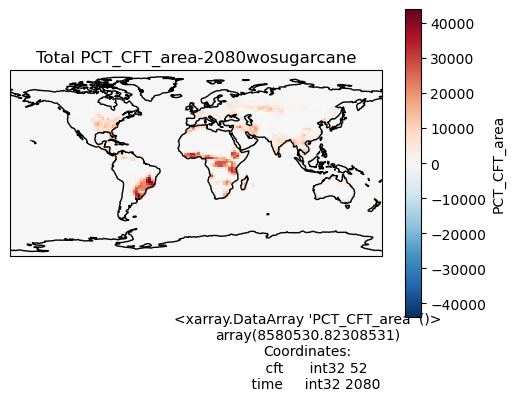

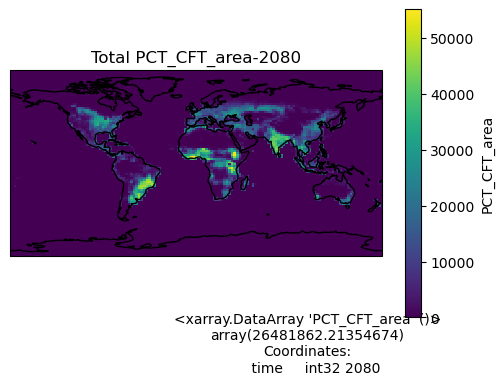

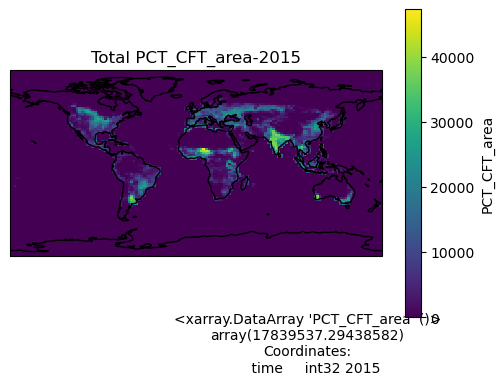

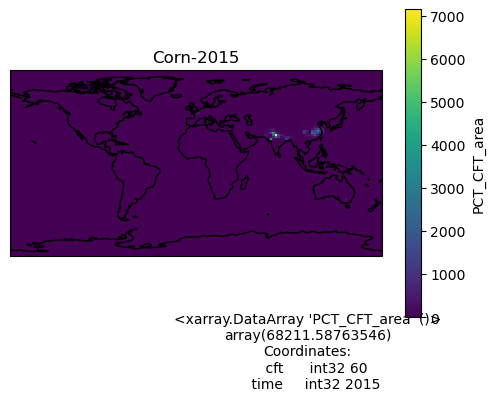

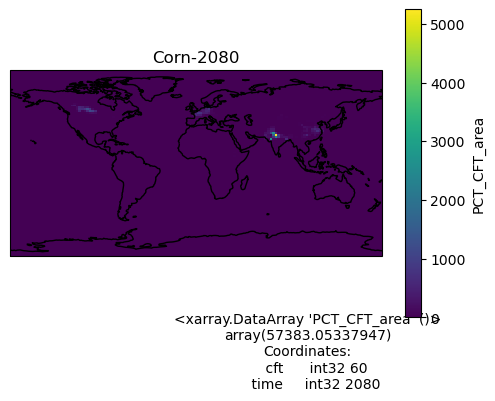

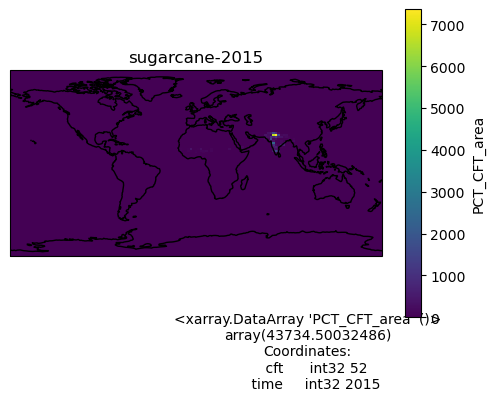

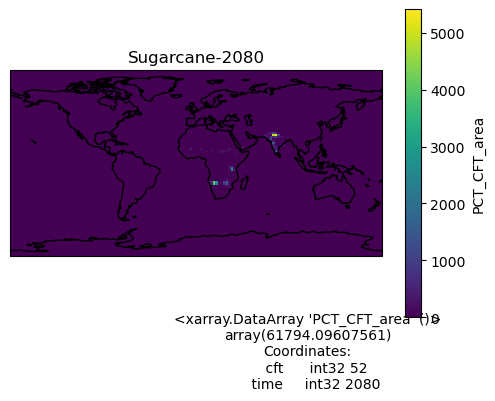

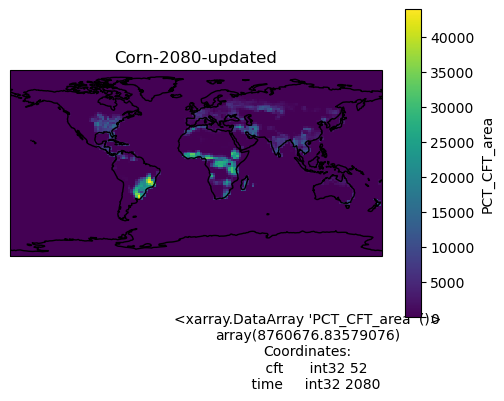

In [2]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)
dset1['PCT_CFT_area'] =(dset1['PCT_CFT']/100)*dset1['AREA']*(dset1['PCT_CROP']/100)
 
#Find the increase in tot area in 2090 wrt 2015 
TotCFTArea_diff_2080 = (dset1['PCT_CFT_area'].sel(time=2080).sum('cft')) - (dset1['PCT_CFT_area'].sel(time=2015).sum('cft'))  # increased area in 2090

#Reduce sugracane area from total area, because increase in sugarcane area needs to be kept as it is. 
TotCFTArea_diff_2080wo_cane = TotCFTArea_diff_2080 - (dset1['PCT_CFT_area'].loc[dict(cft=52, time=2080)]) 
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
TotCFTArea_diff_2080wo_cane.plot()
plt.title('Total PCT_CFT_area-2080wosugarcane')
plt.text(0.8, -0.3, TotCFTArea_diff_2080wo_cane.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)  

# Calculate the increased area at grid points where TotCFTArea_diff_2090 > 0, ie to filter out the gridpoints where area is decreased
increased_area = TotCFTArea_diff_2080wo_cane.where(TotCFTArea_diff_2080wo_cane > 0, 0)
print(increased_area)
#print(TotCFTArea_diff_2090)
#print(TotCFTArea_diff_2090wo_cane)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].sum('cft').sel(time=2080).plot()
plt.title('Total PCT_CFT_area-2080')
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].sum('cft').sel(time=2080).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)  
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].sum('cft').sel(time=2015).plot()
plt.title('Total PCT_CFT_area-2015')
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].sum('cft').sel(time=2015).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)  

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=60, time=2015)].plot()
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=60, time=2015)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('Corn-2015')
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=60, time=2080)].plot()
axs.coastlines(linewidth=1)
plt.title('Corn-2080')
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=60, time=2080)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
print(dset1['PCT_CFT_area'].loc[dict(cft=60, time=2080)].sum())

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=52, time=2015)].plot()
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=52, time=2015)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('sugarcane-2015')
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=52, time=2080)].plot()
axs.coastlines(linewidth=1)
plt.title('Sugarcane-2080')
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=52, time=2080)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
print(dset1['PCT_CFT_area'].loc[dict(cft=60, time=2080)].sum())

#  Add the increased area to the specific cft in 2080, ##2015 area+ increased
updated_cft_60_2080 =  increased_area # dset1['PCT_CFT_area'].loc[dict(cft=60, time=2015)] + increased_area

# Now, Assign the updated values to the specific cft at time=2090
dset1['PCT_CFT_area'].loc[dict(cft=60, time=2080)] = updated_cft_60_2080
#dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)] = filtered_data  # Attribute the increased area to a specific crop (crop)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
updated_cft_60_2080.plot()
axs.coastlines(linewidth=1)
plt.text(0.8, -0.3, updated_cft_60_2080.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('Corn-2080-updated')



<xarray.DataArray 'PCT_CFT_area' ()>
array(61794.09607561)
Coordinates:
    cft      int32 52
    time     int32 2080


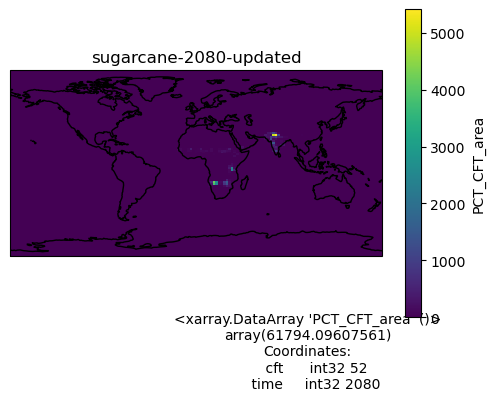

In [18]:
#Now,copy and keep the sugarcane and corn (increased) area of 2090 into a new variable 
cft_52_2080 = dset1['PCT_CFT_area'].loc[dict(cft=52, time=2080)].copy()  # Select the values for cft=52 in 2080, sugarcane
cft_60_2080 = dset1['PCT_CFT_area'].loc[dict(cft=60, time=2080)].copy()  # Select the values for cft=60 in 2080, corn
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
cft_52_2080.plot()
plt.title('sugarcane-2080-updated')
plt.text(0.8, -0.3, cft_52_2080.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)


print(cft_52_2080.sum())



<xarray.DataArray 'PCT_CFT_area' ()>
array(8768629.00468955)
Coordinates:
    cft      int32 60
    time     int32 2090


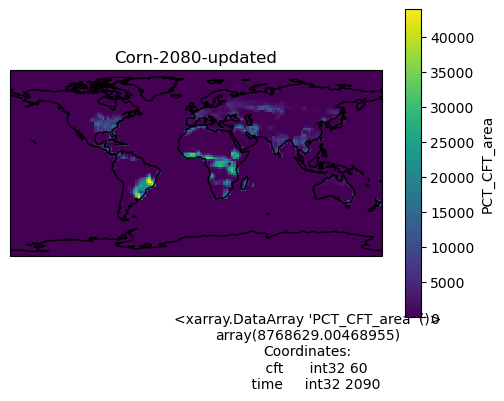

In [22]:
# creating the new dataset of 2080, first copy 2015 data to 2080, and replace the corn with the new calculated one
dset1['PCT_CFT_area'].sel(time=2080)[:] = dset1['PCT_CFT_area'].sel(time=2015)
dset1['PCT_CFT_area'].loc[dict(cft=60, time=2080)] = cft_60_2080

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=60, time=2080)].plot()
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)
plt.title('Corn-2080-updated')
#Now check the sum of PCT_CFT of 2090 in the new dataset  is the same as that of the old
print(dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].sum())


<xarray.DataArray 'PCT_CFT_area' ()>
array(26539954.71143991)
Coordinates:
    time     int32 2080


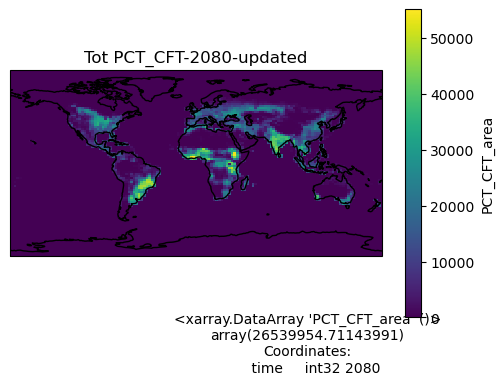

In [23]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].sum('cft').sel(time=2080).plot()
axs.coastlines(linewidth=1)
plt.title('Tot PCT_CFT-2080-updated')
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].sum('cft').sel(time=2080).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);

print(dset1['PCT_CFT_area'].sel(time=2080).sum())

In [8]:
#dset1['PCT_CFT_area'].sel(time=2090)
dset1['PCT_CFT_back'] = (dset1['PCT_CFT_area'].sel(time=2090) / (dset1['AREA'] * (dset1['PCT_CROP'].sel(time=2090) / 100))) * 100

In [11]:
dset1['PCT_CFT_back']

<xarray.DataArray 'PCT_CFT_back' (cft: 64, Latitude: 96, Longitude: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * cft        (cft) int32 15 16 17 18 19 20 21 22 ... 71 72 73 74 75 76 77 78
  * Latitude   (Latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * Longitude  (Longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5

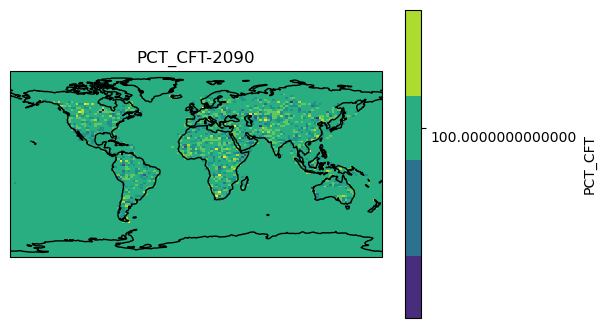

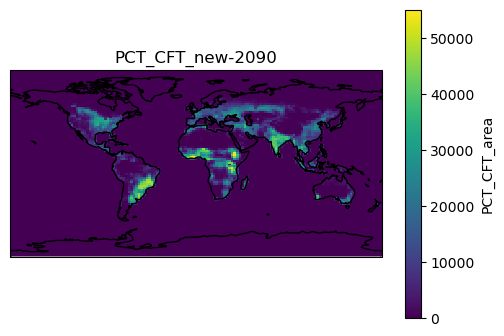

In [13]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT'].sum('cft').sel(time=2090).plot()
plt.title('PCT_CFT-2090')
axs.coastlines(linewidth=1)  

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].sum('cft').sel(time=2090).plot()
plt.title('PCT_CFT_new-2090')
axs.coastlines(linewidth=1) 

## Use PCT_CFT as it is and do the calculations

In [140]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)

TotCFTArea_diff_2090 = (dset1['PCT_CFT'].sel(time=2090).sum('cft')) - (dset1['PCT_CFT'].sel(time=2015).sum('cft')) 
mask = TotCFTArea_diff_2090 > 0
masked_data = TotCFTArea_diff_2090.where(mask)          # consider only the values above zero
#dset1['temp_var'] = xr.where((TotCropArea_diff_2090 > 0) & (TotCFTArea_diff_2090 > 0), dset1['temp_var'], 0)

#dset1['PCT_CFT'].sel(time=2090)[:] = dset1['PCT_CFT'].sel(time=2015).values
print(dset1['PCT_CFT'].sel(time=2090).isel(cft=60).sum())
#dset1['PCT_CFT'].loc[dict(cft=60, time=2090)] += masked_data
dset1['PCT_CFT'] = dset1['PCT_CFT'].where(~mask, masked_data)
print(dset1['PCT_CFT'].sel(time=2090).isel(cft=60).sum())

#dset1['PCT_CFT'].to_netcdf('/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c1905_2090modified.nc', encoding={'PCT_CFT': {'dtype': 'float64'}})
masked_data


<xarray.DataArray 'PCT_CFT' ()>
array(15992.55632002)
Coordinates:
    cft      int32 75
    time     int32 2090
<xarray.DataArray 'PCT_CFT' ()>
array(11510.60341577)
Coordinates:
    cft      int32 75
    time     int32 2090


<xarray.DataArray 'PCT_CFT' (Latitude: 96, Longitude: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Latitude   (Latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * Longitude  (Longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5

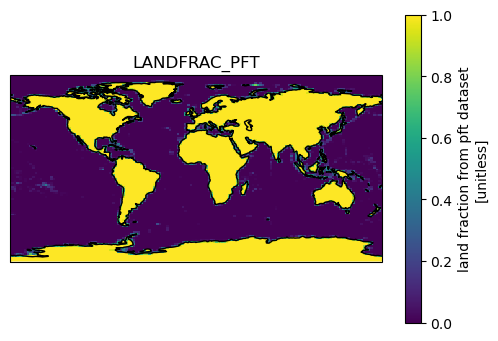

In [11]:
dset1['LANDFRAC_PFT']
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['LANDFRAC_PFT'].plot()
plt.title('LANDFRAC_PFT')
axs.coastlines(linewidth=1) 